<a href="https://colab.research.google.com/github/singwang-cn/Neural-Network/blob/master/Implementation_of_LSTM_with_Pytorch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [162]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import torch
from torch import nn
from torchvision import datasets, transforms

In [269]:
rnn = torch.nn.LSTM(10, 20, 4, dropout=0.2)
input = torch.randn(5, 3, 10)
h0 = torch.randn(4, 3, 20)
c0 = torch.randn(4, 3, 20)
output, (hn, cn) = rnn(input, (h0, c0))

In [124]:
data_path = '/content/drive/MyDrive/Dataset/sh stock/000001.csv'
data_orig = pd.read_csv(data_path, encoding = 'gb18030', engine='python')['收盘价']

In [184]:
sample_offset = 5
sample_start = 742
sample_end = 1473
data_slice = data[sample_start:sample_end].tolist()
data_slice.reverse()
x = []
for i in range(sample_end-sample_start-sample_offset-1):
  sub_x = []
  for num in data_slice[i:i+sample_offset]:
    sub_x.append([num])
  x.append(sub_x)
y = []
for num in data_slice[sample_offset+1:]:
  y.append([num])

train_x = torch.Tensor(np.array(x))
train_y = torch.Tensor(np.array(y))

In [205]:
train_x.shape

torch.Size([725, 5, 1])

In [ ]:
train_y

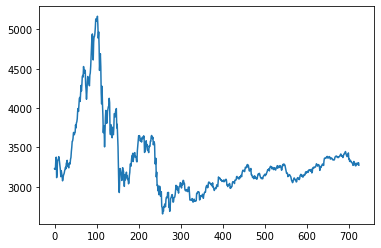

In [161]:
plt.plot(y)

In [230]:
data_set = torch.utils.data.TensorDataset(train_x, train_y)
data_loader = torch.utils.data.DataLoader(data_set, 5, shuffle=False, num_workers=1)

In [311]:
class rnn(torch.nn.Module):
    def __init__(self):
        super(rnn, self).__init__()
        self.rnn = torch.nn.LSTM(
            input_size=1,
            hidden_size=32,
            num_layers=5,
            batch_first=False,
        )
        self.linear = torch.nn.Linear(32, 1)

    def forward(self, x):
        lstm_out, (h_n, c_n) = self.rnn(x, None)
        out = self.linear(lstm_out[:, -1, :])
        return out
model = rnn()


criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [305]:
class lstm(nn.Module):
    def __init__(self,input_size,hidden_size,output_size=1,num_layer=2):
        super(lstm,self).__init__()
        self.layer1 = nn.LSTM(input_size,hidden_size,num_layer)
        self.layer2 = nn.Linear(hidden_size,output_size)
    
    def forward(self,x):
        x,_ = self.layer1(x)
        s,b,h = x.size()
        x = x.view(s*b,h)
        x = self.layer2(x)
        x = x.view(s,b,-1)
        return x

model = lstm(1, 32, 1, 5)
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [ ]:
for epoch in range(150):
  for step, (x_set, y_set) in enumerate(data_loader):
    
    y_pre = model(x_set)
    loss = criterion(y_pre, y_set)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if step % 100 == 0:
      print('{:<4}{:<6}' .format(epoch, step), loss.item())

In [ ]:
train_x.shape

In [294]:
input = torch.randn(725, 5, 1)
dami_y = torch.randn(725, 1, 1)
dami_y_list = []
for i in range(dami_y.shape[0]):
  dami_y_list.append(dami_y.tolist()[i][0])

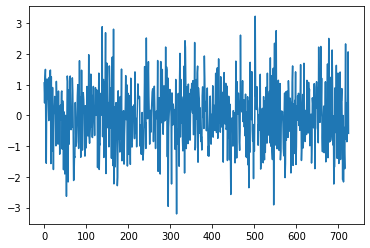

In [295]:
plt.plot(dami_y_list)

In [ ]:
data_set = torch.utils.data.TensorDataset(input, dami_y)
data_loader = torch.utils.data.DataLoader(data_set, 5, shuffle=False, num_workers=1)
for epoch in range(50):
  for step, (x_set, y_set) in enumerate(data_loader):
    
    y_pre = model(x_set)
    loss = criterion(y_pre, y_set)

    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if step % 100 == 0:
      print('{:<4}{:<6}' .format(epoch, step), loss.item())

In [308]:
pre_dami_y = model(input)
pre_dami_y_list = []
for i in range(pre_dami_y.shape[0]):
  pre_dami_y_list.append(pre_dami_y.tolist()[i][0])

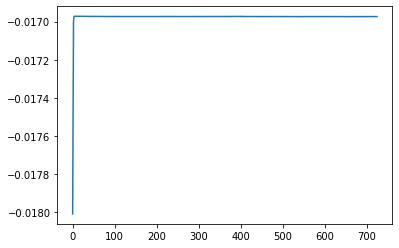

In [310]:
plt.plot(pre_dami_y_list)

In [283]:
pre_y = model(input)

In [ ]:
pre_y.tolist()

In [244]:
pre_y_list = []
for i in range(pre_y.shape[0]):
  pre_y_list.append(pre_y.tolist()[i][0][0])

In [ ]:
pre_y_list

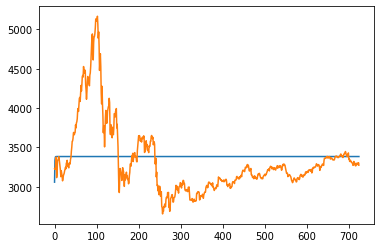

In [246]:
plt.plot(pre_y_list)
plt.plot(y)

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

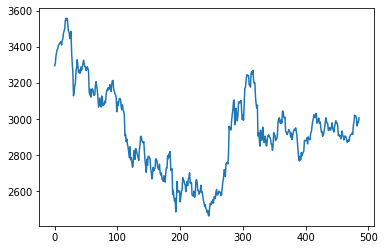

In [54]:
data_csv = pd.read_csv('/content/drive/MyDrive/Dataset/sh stock/000001.csv', encoding = 'gb18030',usecols=[3])
#data_list = np.array(data_csv).tolist()[742:1473]
data_list = np.array(data_csv).tolist()[256:742]
#data_list = np.array(data_csv).tolist()[499:986]
data_list.reverse()
data_csv = pd.DataFrame(data_list)
plt.plot(data_csv)

In [55]:
data_csv = data_csv.dropna()  # 滤除缺失数据
dataset = data_csv.values   # 获得csv的值
dataset = dataset.astype('float32')
max_value = np.max(dataset)  # 获得最大值
min_value = np.min(dataset)  # 获得最小值
scalar = max_value - min_value  # 获得间隔数量
dataset = list(map(lambda x: x / scalar, dataset)) # 归一化

In [57]:
def create_dataset(dataset, look_back=2):
    dataX, dataY = [], []
    for i in range(len(dataset) - look_back):
        a = dataset[i:(i + look_back)]
        dataX.append(a)
        dataY.append(dataset[i + look_back])
    return np.array(dataX), np.array(dataY)

# 创建好输入输出
data_X, data_Y = create_dataset(dataset)

In [39]:
# 划分训练集和测试集，70% 作为训练集
train_size = int(len(data_X) * 0.7)
test_size = len(data_X) - train_size
train_X = data_X[:train_size]
train_Y = data_Y[:train_size]
test_X = data_X[train_size:]
test_Y = data_Y[train_size:]

In [40]:
import torch

train_X = train_X.reshape(-1, 1, 2)
train_Y = train_Y.reshape(-1, 1, 1)
test_X = test_X.reshape(-1, 1, 2)

train_x = torch.from_numpy(train_X)
train_y = torch.from_numpy(train_Y)
test_x = torch.from_numpy(test_X)

In [12]:
from torch import nn
from torch.autograd import Variable

class lstm(nn.Module):
    def __init__(self,input_size=2,hidden_size=4,output_size=1,num_layer=2):
        super(lstm,self).__init__()
        self.layer1 = nn.LSTM(input_size,hidden_size,num_layer,dropout=0.2)
        self.layer2 = nn.Linear(hidden_size,output_size)
    
    def forward(self,x):
        x,_ = self.layer1(x)
        s,b,h = x.size()
        x = x.view(s*b,h)
        x = self.layer2(x)
        x = x.view(s,b,-1)
        return x

model = lstm(2, 4, 1, 2)

In [13]:
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-2)

In [14]:
# 开始训练
for e in range(1000):
    var_x = Variable(train_x)
    var_y = Variable(train_y)
    # 前向传播
    out = model(var_x)
    loss = criterion(out, var_y)
    # 反向传播
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    
    if (e + 1) % 100 == 0: # 每 100 次输出结果
        print('Epoch: {}, Loss: {:.5f}'.format(e + 1, loss.item()))

Epoch: 100, Loss: 0.04370
Epoch: 200, Loss: 0.04286
Epoch: 300, Loss: 0.01212
Epoch: 400, Loss: 0.00553
Epoch: 500, Loss: 0.00317
Epoch: 600, Loss: 0.00355
Epoch: 700, Loss: 0.00288
Epoch: 800, Loss: 0.00256
Epoch: 900, Loss: 0.00199
Epoch: 1000, Loss: 0.00359


In [58]:
model = model.eval() # 转换成测试模式

data_X = data_X.reshape(-1, 1, 2)
data_X = torch.from_numpy(data_X)
var_data = Variable(data_X)
pred_test = model(var_data) # 测试集的预测结果
# 改变输出的格式
pred_test = pred_test.view(-1).data.numpy()

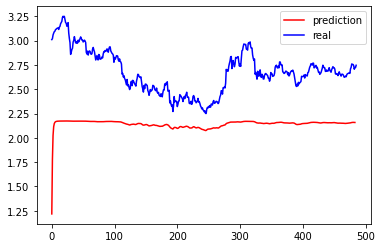

In [59]:
# 画出实际结果和预测的结果
plt.plot(pred_test, 'r', label='prediction')
plt.plot(dataset, 'b', label='real')
plt.legend(loc='best')

In [27]:
sum = 0
for i in range(pred_test.shape[0]):
  sum += abs(dataset[i][0]-pred_test[i])
sum_value = 0
for i in range(pred_test.shape[0]):
  sum_value += dataset[i][0]
print(sum/sum_value)

0.01618096044091836


In [23]:
pred_test.shape

(729,)